<a href="https://colab.research.google.com/github/Aurelien07/Kaggle_competition/blob/main/Poker_rule_induction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Small explaination about the project :

You are provided with 25,010 poker hands in train.csv and 1,000,000 in test.
csv. 

Each hand consists of five cards with a given suit and rank, drawn from a standard deck of 52. Suits and ranks are represented as ordinal categories:

S1 “Suit of card #1”

Ordinal (1-4) representing {Hearts, Spades, Diamonds, Clubs}

C1 “Rank of card #1”

Numerical (1-13) representing (Ace, 2, 3, ... , Queen, King)


S5 “Suit of card #5”
C5 “Rank of card #5”

- 0: Nothing in hand; not a recognized poker hand 

- 1: One pair; one pair of equal ranks within five cards

- 2: Two pairs; two pairs of equal ranks within five cards

- 3: Three of a kind; three equal ranks within five cards

- 4: Straight; five cards, sequentially ranked with no gaps

- 5: Flush; five cards with the same suit

- 6: Full house; pair + different rank three of a kind

- 7: Four of a kind; four equal ranks within five cards

- 8: Straight flush; straight + flush

- 9: Royal flush; {Ace, King, Queen, Jack, Ten} + flush

## Import library

In [6]:
# for basic stuff in python
import pandas as pd
import numpy as np

# for vizualisation : 
import matplotlib.pyplot as plt
import seaborn as sns

# against warnings :
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# for prediction :
from sklearn.model_selection import train_test_split

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/Colab Notebooks/poker-rule-induction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/My Drive/Colab Notebooks/poker-rule-induction/sampleSubmission.csv.zip
/content/drive/My Drive/Colab Notebooks/poker-rule-induction/test.csv.zip
/content/drive/My Drive/Colab Notebooks/poker-rule-induction/train.csv.zip
/content/drive/My Drive/Colab Notebooks/poker-rule-induction/Poker_rule_induction.ipynb


In [9]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/poker-rule-induction/train.csv.zip")

### Vizualisation :

In [11]:
print("Vizualisation for the DataFrame :")
display(df)
print("")
print("Vizualisation for the DataFrame Describe :")
display(df.describe(include='all'))

Vizualisation for the DataFrame :


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25005,4,9,4,6,3,6,4,12,4,5,1
25006,3,8,3,5,4,11,2,2,1,13,0
25007,1,8,4,5,3,11,3,2,2,13,0
25008,4,12,3,5,2,1,2,7,4,6,0



Vizualisation for the DataFrame Describe :


,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
count,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000,25010.000000
mean,2.508756,6.995242,2.497721,7.014194,2.510236,7.014154,2.495922,6.942463,2.497321,6.962735,0.621152
std,1.116483,3.749805,1.121767,3.766974,1.123148,3.744974,1.116009,3.747147,1.118732,3.741579,0.788361
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,4.000000,1.000000,4.000000,2.000000,4.000000,1.000000,4.000000,1.000000,4.000000,0.000000
50%,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,2.000000,7.000000,3.000000,7.000000,1.000000
75%,4.000000,10.000000,4.000000,10.000000,4.000000,10.000000,3.000000,10.000000,3.000000,10.000000,1.000000
max,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,4.000000,13.000000,9.000000


# Exploration of data :

## Distribution of Class :

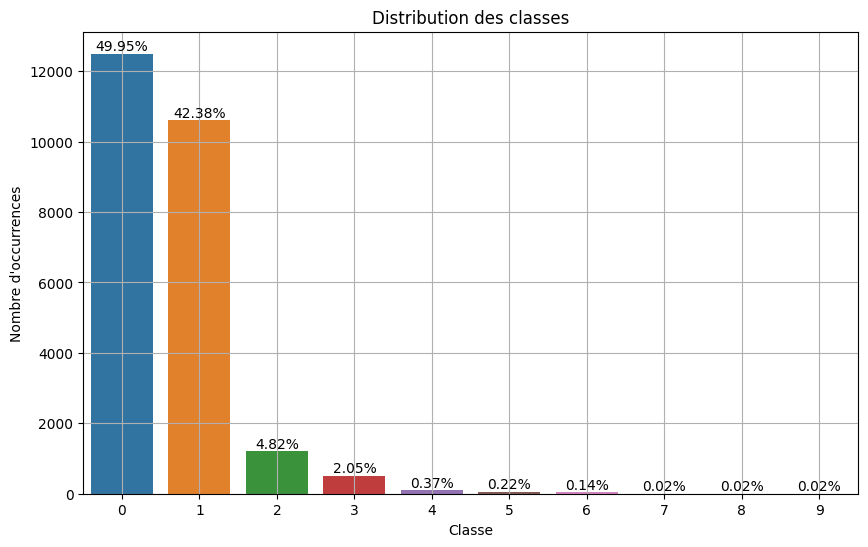

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Utiliser Seaborn pour afficher la distribution des classes
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='hand')

# Ajouter les pourcentages sur les barres
total_count = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height/total_count*100:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom')

plt.xlabel('Classe')
plt.ylabel("Nombre d'occurrences")
plt.title('Distribution des classes')
plt.grid(True)
plt.show()

Choisissez une classe (0-9) : 0
Choisissez une caractéristique (S1, C1, S2, C2, S3, C3, S4, C4, S5, C5) : C1


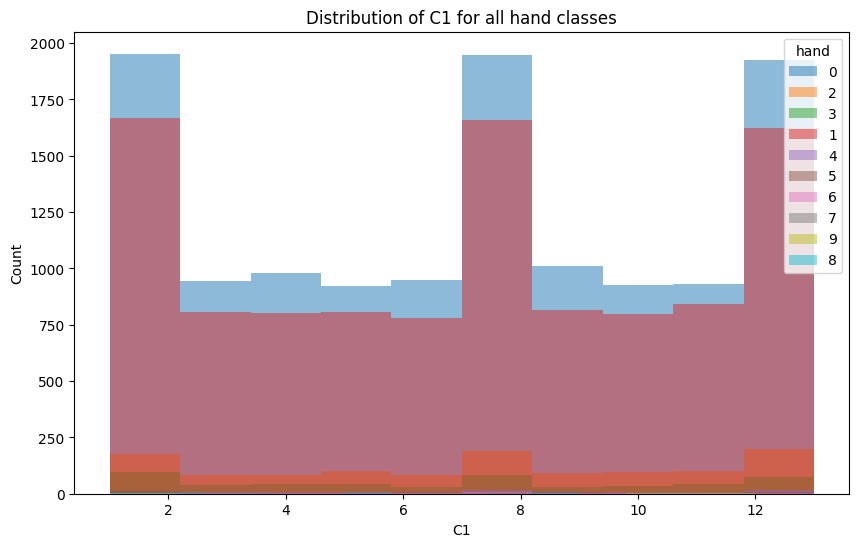

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Demande à l'utilisateur de choisir la classe et la caractéristique
chosen_class = int(input("Choisissez une classe (0-9) : "))
chosen_feature = input("Choisissez une caractéristique (S1, C1, S2, C2, S3, C3, S4, C4, S5, C5) : ")

# Vérification de l'entrée utilisateur
if chosen_class not in df['hand'].unique() or chosen_feature not in df.columns:
    print("Classe ou caractéristique invalide !")
else:
    # Histogramme pour la caractéristique choisie en fonction de toutes les classes
    plt.figure(figsize=(10, 6))
    for hand_class in df['hand'].unique():
        plt.hist(df[df['hand'] == hand_class][chosen_feature], bins=10, alpha=0.5, label=str(hand_class))
    plt.xlabel(chosen_feature)
    plt.ylabel('Count')
    plt.legend(title='hand')
    plt.title(f"Distribution of {chosen_feature} for all hand classes")
    plt.show()

In [ ]:
## Univarié :

Choisissez une classe (0-9) : 7
Choisissez une caractéristique (S1, C1, S2, C2, S3, C3, S4, C4, S5, C5) : C3


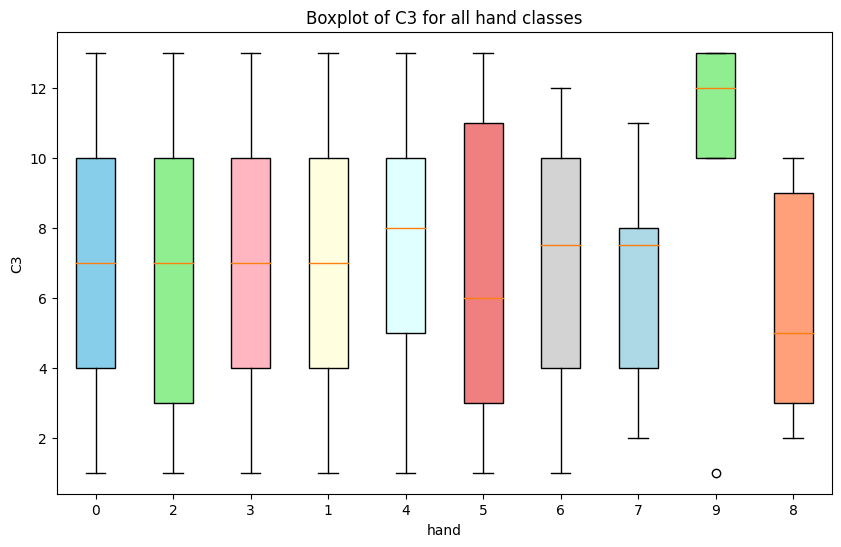

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Demande à l'utilisateur de choisir la classe et la caractéristique
chosen_class = int(input("Choisissez une classe (0-9) : "))
chosen_feature = input("Choisissez une caractéristique (S1, C1, S2, C2, S3, C3, S4, C4, S5, C5) : ")

# Vérification de l'entrée utilisateur

if chosen_class not in df['hand'].unique() or chosen_feature not in df.columns:
    print("Classe ou caractéristique invalide !")
else:

    # Couleurs personnalisées pour les boxplots :
    colors = ['skyblue', 'lightgreen', 'lightpink', 'lightyellow', 'lightcyan', 'lightcoral', 'lightgrey', 'lightblue', 'lightgreen', 'lightsalmon']

    # Diagramme en boîte pour la caractéristique choisie en fonction de toutes les classes :
    plt.figure(figsize=(10, 6))
    boxplot_data = [df[df['hand'] == hand_class][chosen_feature] for hand_class in df['hand'].unique()]
    boxplot = plt.boxplot(boxplot_data, labels=[str(hand_class) for hand_class in df['hand'].unique()], patch_artist=True)

    # Personnalisation des couleurs des boxplots
    for patch, color in zip(boxplot['boxes'], colors):
        patch.set_facecolor(color)

    plt.xlabel('hand')
    plt.ylabel(chosen_feature)
    plt.title(f"Boxplot of {chosen_feature} for all hand classes")
    plt.show()


## multivarié :

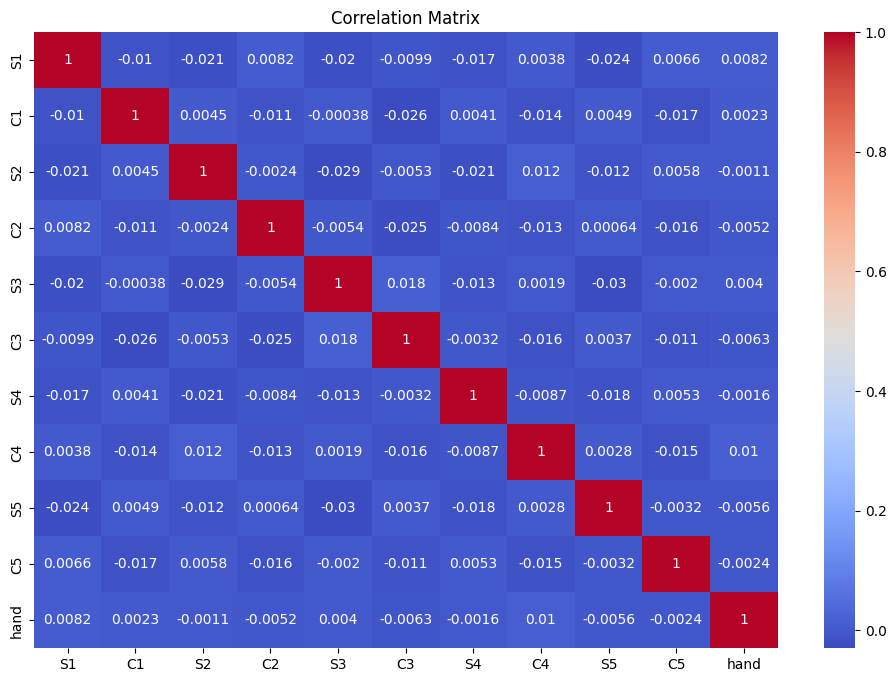

In [40]:
# Calcul de la matrice de corrélation
corr_matrix = df.corr()

# Affichage de la matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()